# EXPLORATORY DATA ANALYSIS

#### 1. Data Cleaning and Preparation


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the dataset into a data frame or equivalent data structure.

In [2]:
df=pd.read_csv(r"C:\Users\tilna\Downloads\Cardiotocographic.csv")

In [3]:
df.shape

(2126, 14)

##### Handle missing values appropriately (e.g., imputation, deletion).

In [4]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
df.isnull().sum().sum()/len(df)*100

np.float64(7.855126999059266)

In [6]:
### mean 
print(df.LB.mean())
print(df.AC.mean())
print(df.DS.mean())
print(df.DP.mean())
print(df.MLTV.mean())
print(df.Width.mean())
print(df.Tendency.mean())
print(df.NSP.mean())

133.3435983550352
0.0032189782438000465
2.5089835057102827e-06
0.00017515121174634704
8.28488742706321
70.42926049411918
0.3163714038702473
1.304507175110962


In [7]:
### mean imputation
df.fillna({'LB':df.LB.mean(),'AC':df.AC.mean(),'DS':df.DS.mean(),'DP':df.DP.mean(),'MLTV':df.MLTV.mean(),'Width':df.Width.mean(),'Tendency':df.Tendency.mean(),'NSP':df.NSP.mean()},inplace=True)

In [8]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(2)

In [10]:
## drping duplicates
df.drop_duplicates(inplace=True,ignore_index=True)

In [11]:
df.duplicated().sum()

np.int64(0)

##### Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [12]:
### table detais
ls of no of columns,rows, datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124 entries, 0 to 2123
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2124 non-null   float64
 1   AC        2124 non-null   float64
 2   FM        2124 non-null   float64
 3   UC        2124 non-null   float64
 4   DL        2124 non-null   float64
 5   DS        2124 non-null   float64
 6   DP        2124 non-null   float64
 7   ASTV      2124 non-null   float64
 8   MSTV      2124 non-null   float64
 9   ALTV      2124 non-null   float64
 10  MLTV      2124 non-null   float64
 11  Width     2124 non-null   float64
 12  Tendency  2124 non-null   float64
 13  NSP       2124 non-null   float64
dtypes: float64(14)
memory usage: 232.4 KB


In [13]:
### checking if any values datatype other that int and float
all_numeric = df.applymap(lambda x: isinstance(x, (int, float))).all().all()

if all_numeric:
    print("All columns are fully numeric.")
else:
    print("Some columns contain non-numeric values.")


All columns are fully numeric.


##### Detect and treat outliers if necessary.

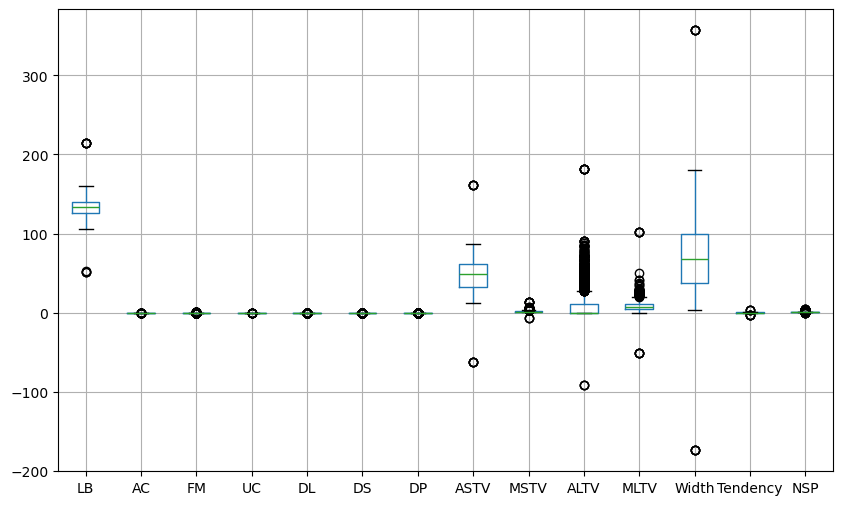

In [14]:
## detect outliers
df.boxplot(figsize=(10,6))
plt.show()

In [15]:
## outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.columns:
    outlier_capping(df,col)


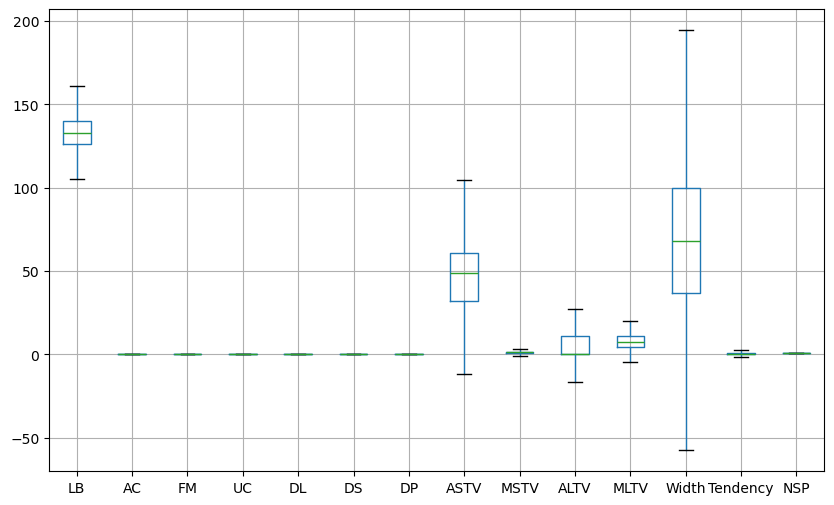

In [16]:
df.boxplot(figsize=(10,6))
plt.show()

#### 2.Statistical Summary:

##### Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range)

In [17]:
# statictical summary of each column
# column 50% refer median
stat_summ=df.describe()
stat_summ

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.0,2124.0,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.0
mean,133.292118,0.003148,0.001570,0.004365,0.001772,0.0,0.0,46.998334,1.304554,6.697979,8.011660,70.352452,0.319963,1.0
std,9.926749,0.003827,0.002487,0.003001,0.002670,0.0,0.0,17.609911,0.781303,10.381254,5.046506,39.575996,0.621818,0.0
min,105.000000,-0.008418,-0.003853,-0.005158,-0.004938,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001668,0.000000,0.004486,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.0
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.0,0.0,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.0
max,161.000000,0.014030,0.006421,0.013552,0.008230,0.0,0.0,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000,1.0


In [18]:
# IQR of columns
IQR=stat_summ.loc['75%']-stat_summ.loc['25%']
IQR

LB          14.000000
AC           0.005612
FM           0.002568
UC           0.004678
DL           0.003292
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

##### Highlight any interesting findings from this summary.

In [19]:
## checking distribution of data
symmetric=[]
Right_skewed=[]
highly_Right_skewed=[]
left_skewed=[]
highly_left_skewed=[]

for col in df.columns:
    skew_value=df[col].skew()
    if abs(skew_value) < 0.01:
        symmetric.append(col)
    elif skew_value>0:
        if skew_value>=1:
            highly_Right_skewed.append(col)
        else: 
            Right_skewed.append(col)
    else:
        if skew_value<=-1:
            highly_left_skewed.append(col)
        else:
            left_skewed.append(col)

print('symmetric columns are:',symmetric)
print('Right_skewed columns are  :',Right_skewed)
print('highly_Right_skewed columns are :',highly_Right_skewed)
print('left_skewed columns are :',left_skewed)
print('highly_left_skewed columns are :',highly_left_skewed)

symmetric columns are: ['DS', 'DP', 'NSP']
Right_skewed columns are  : ['LB', 'UC', 'MSTV', 'MLTV', 'Width']
highly_Right_skewed columns are : ['AC', 'FM', 'DL', 'ALTV']
left_skewed columns are : ['ASTV', 'Tendency']
highly_left_skewed columns are : []


#### 3. Data Visualization:

##### Create histograms or boxplots to visualize the distributions of various numerical variables.

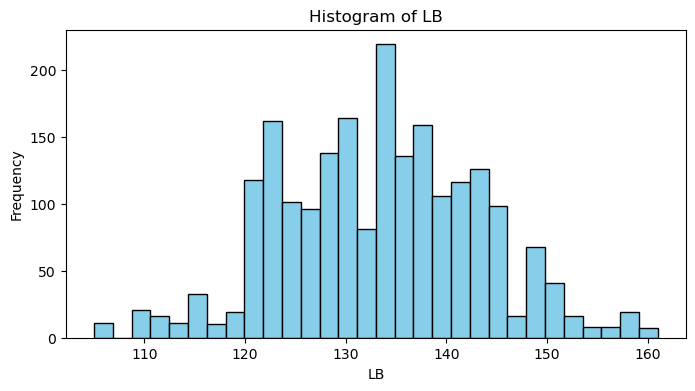

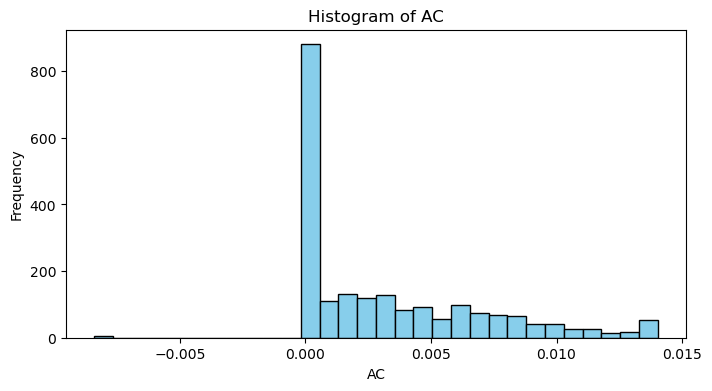

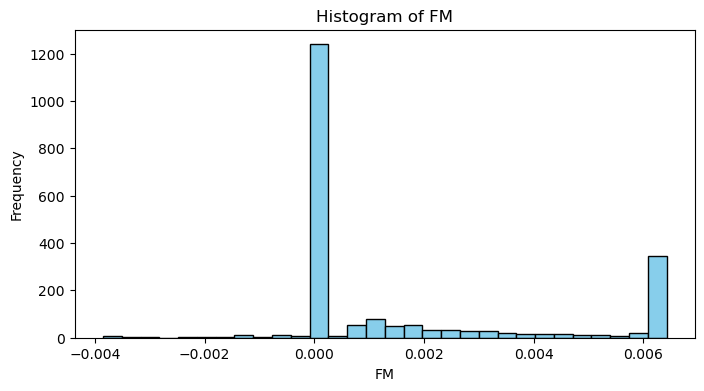

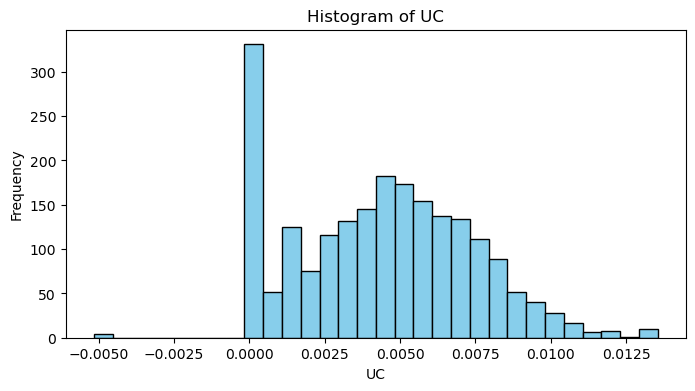

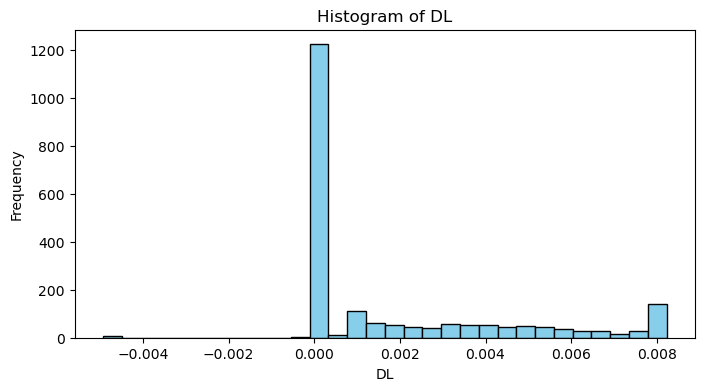

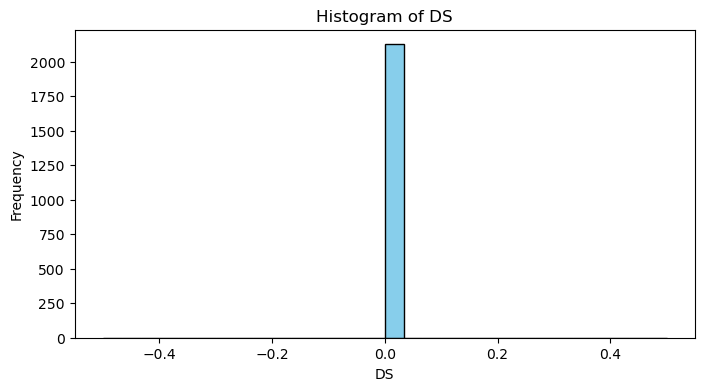

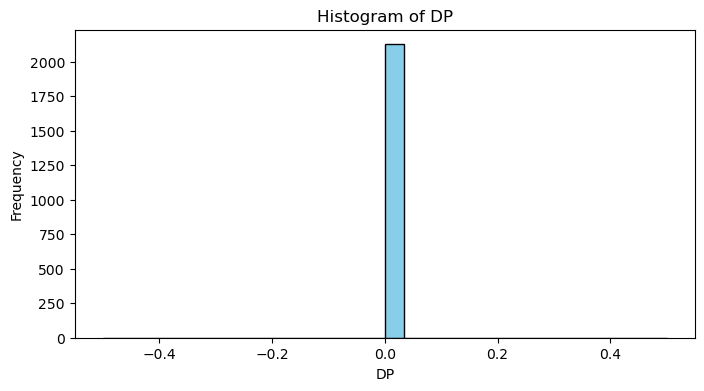

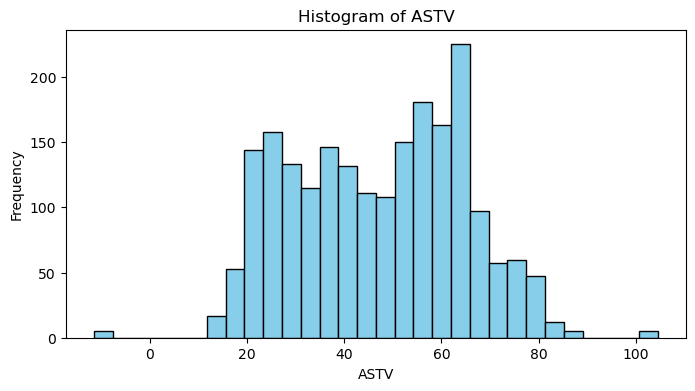

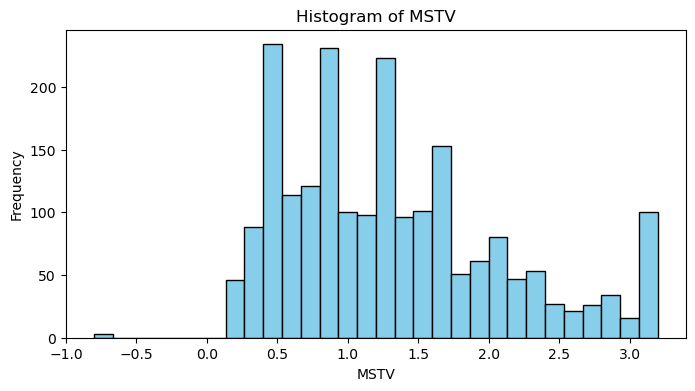

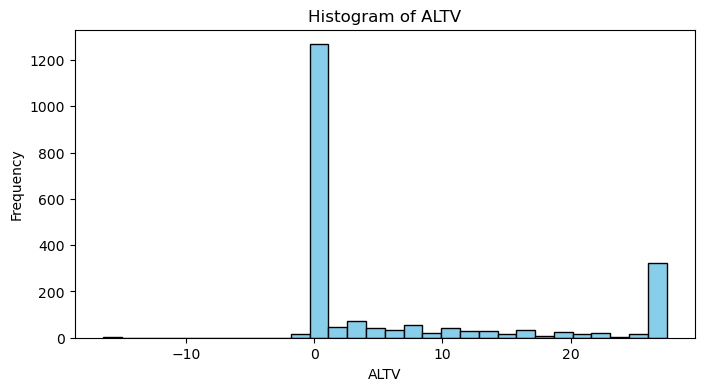

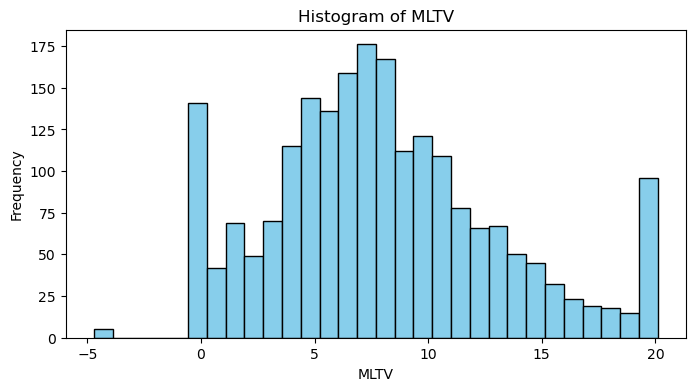

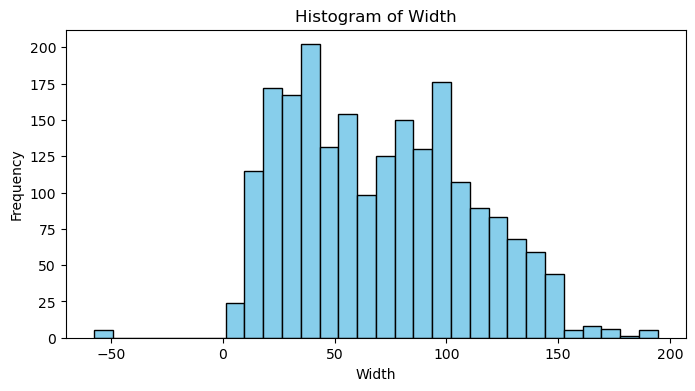

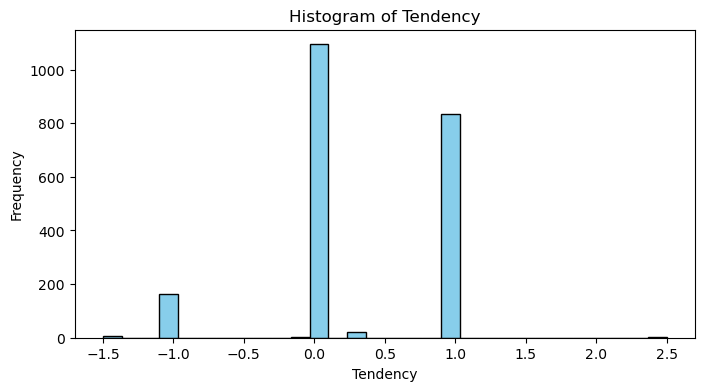

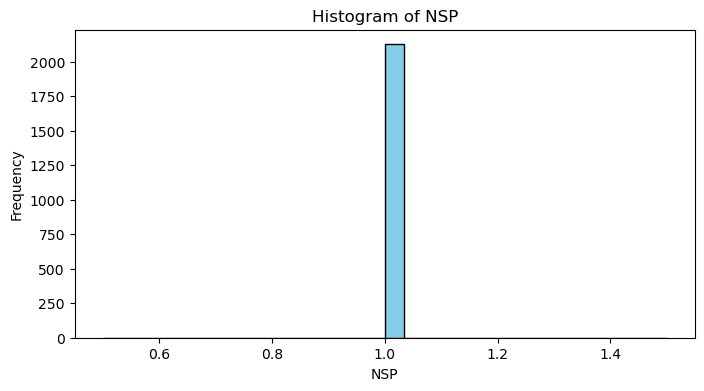

In [20]:
## histogram
for col in df:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##### Use bar charts or pie charts to display the frequency of categories for categorical variables.

In [21]:
## checking number of unique valuues in each column
df.nunique()

LB           152
AC          1037
FM           467
UC          1359
DL           710
DS             1
DP             1
ASTV         183
MSTV         134
ALTV         120
MLTV         297
Width        262
Tendency     111
NSP            1
dtype: int64

##### Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

In [29]:
## drop columns with constant values
df1=df.drop(columns=['DS','DP','NSP'])


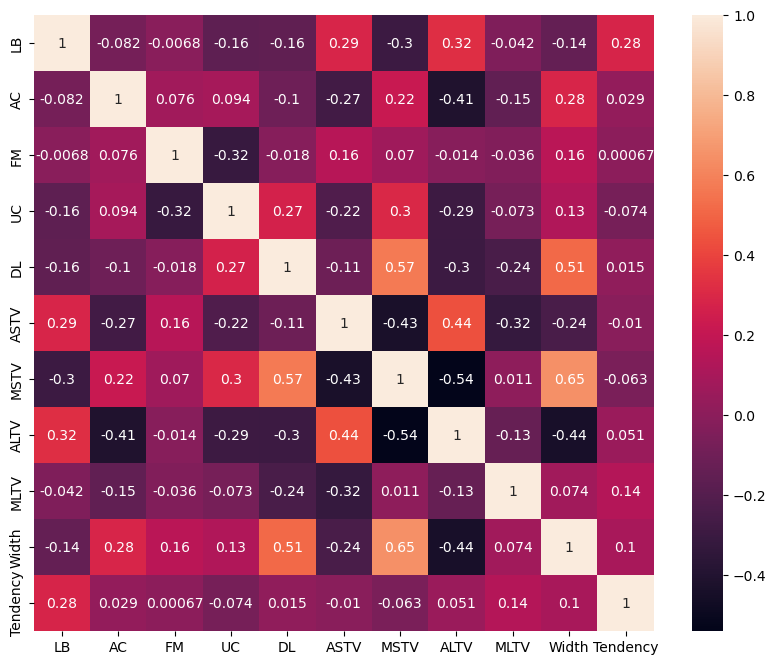

In [30]:
### heatmap - for boxplot
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

##### Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

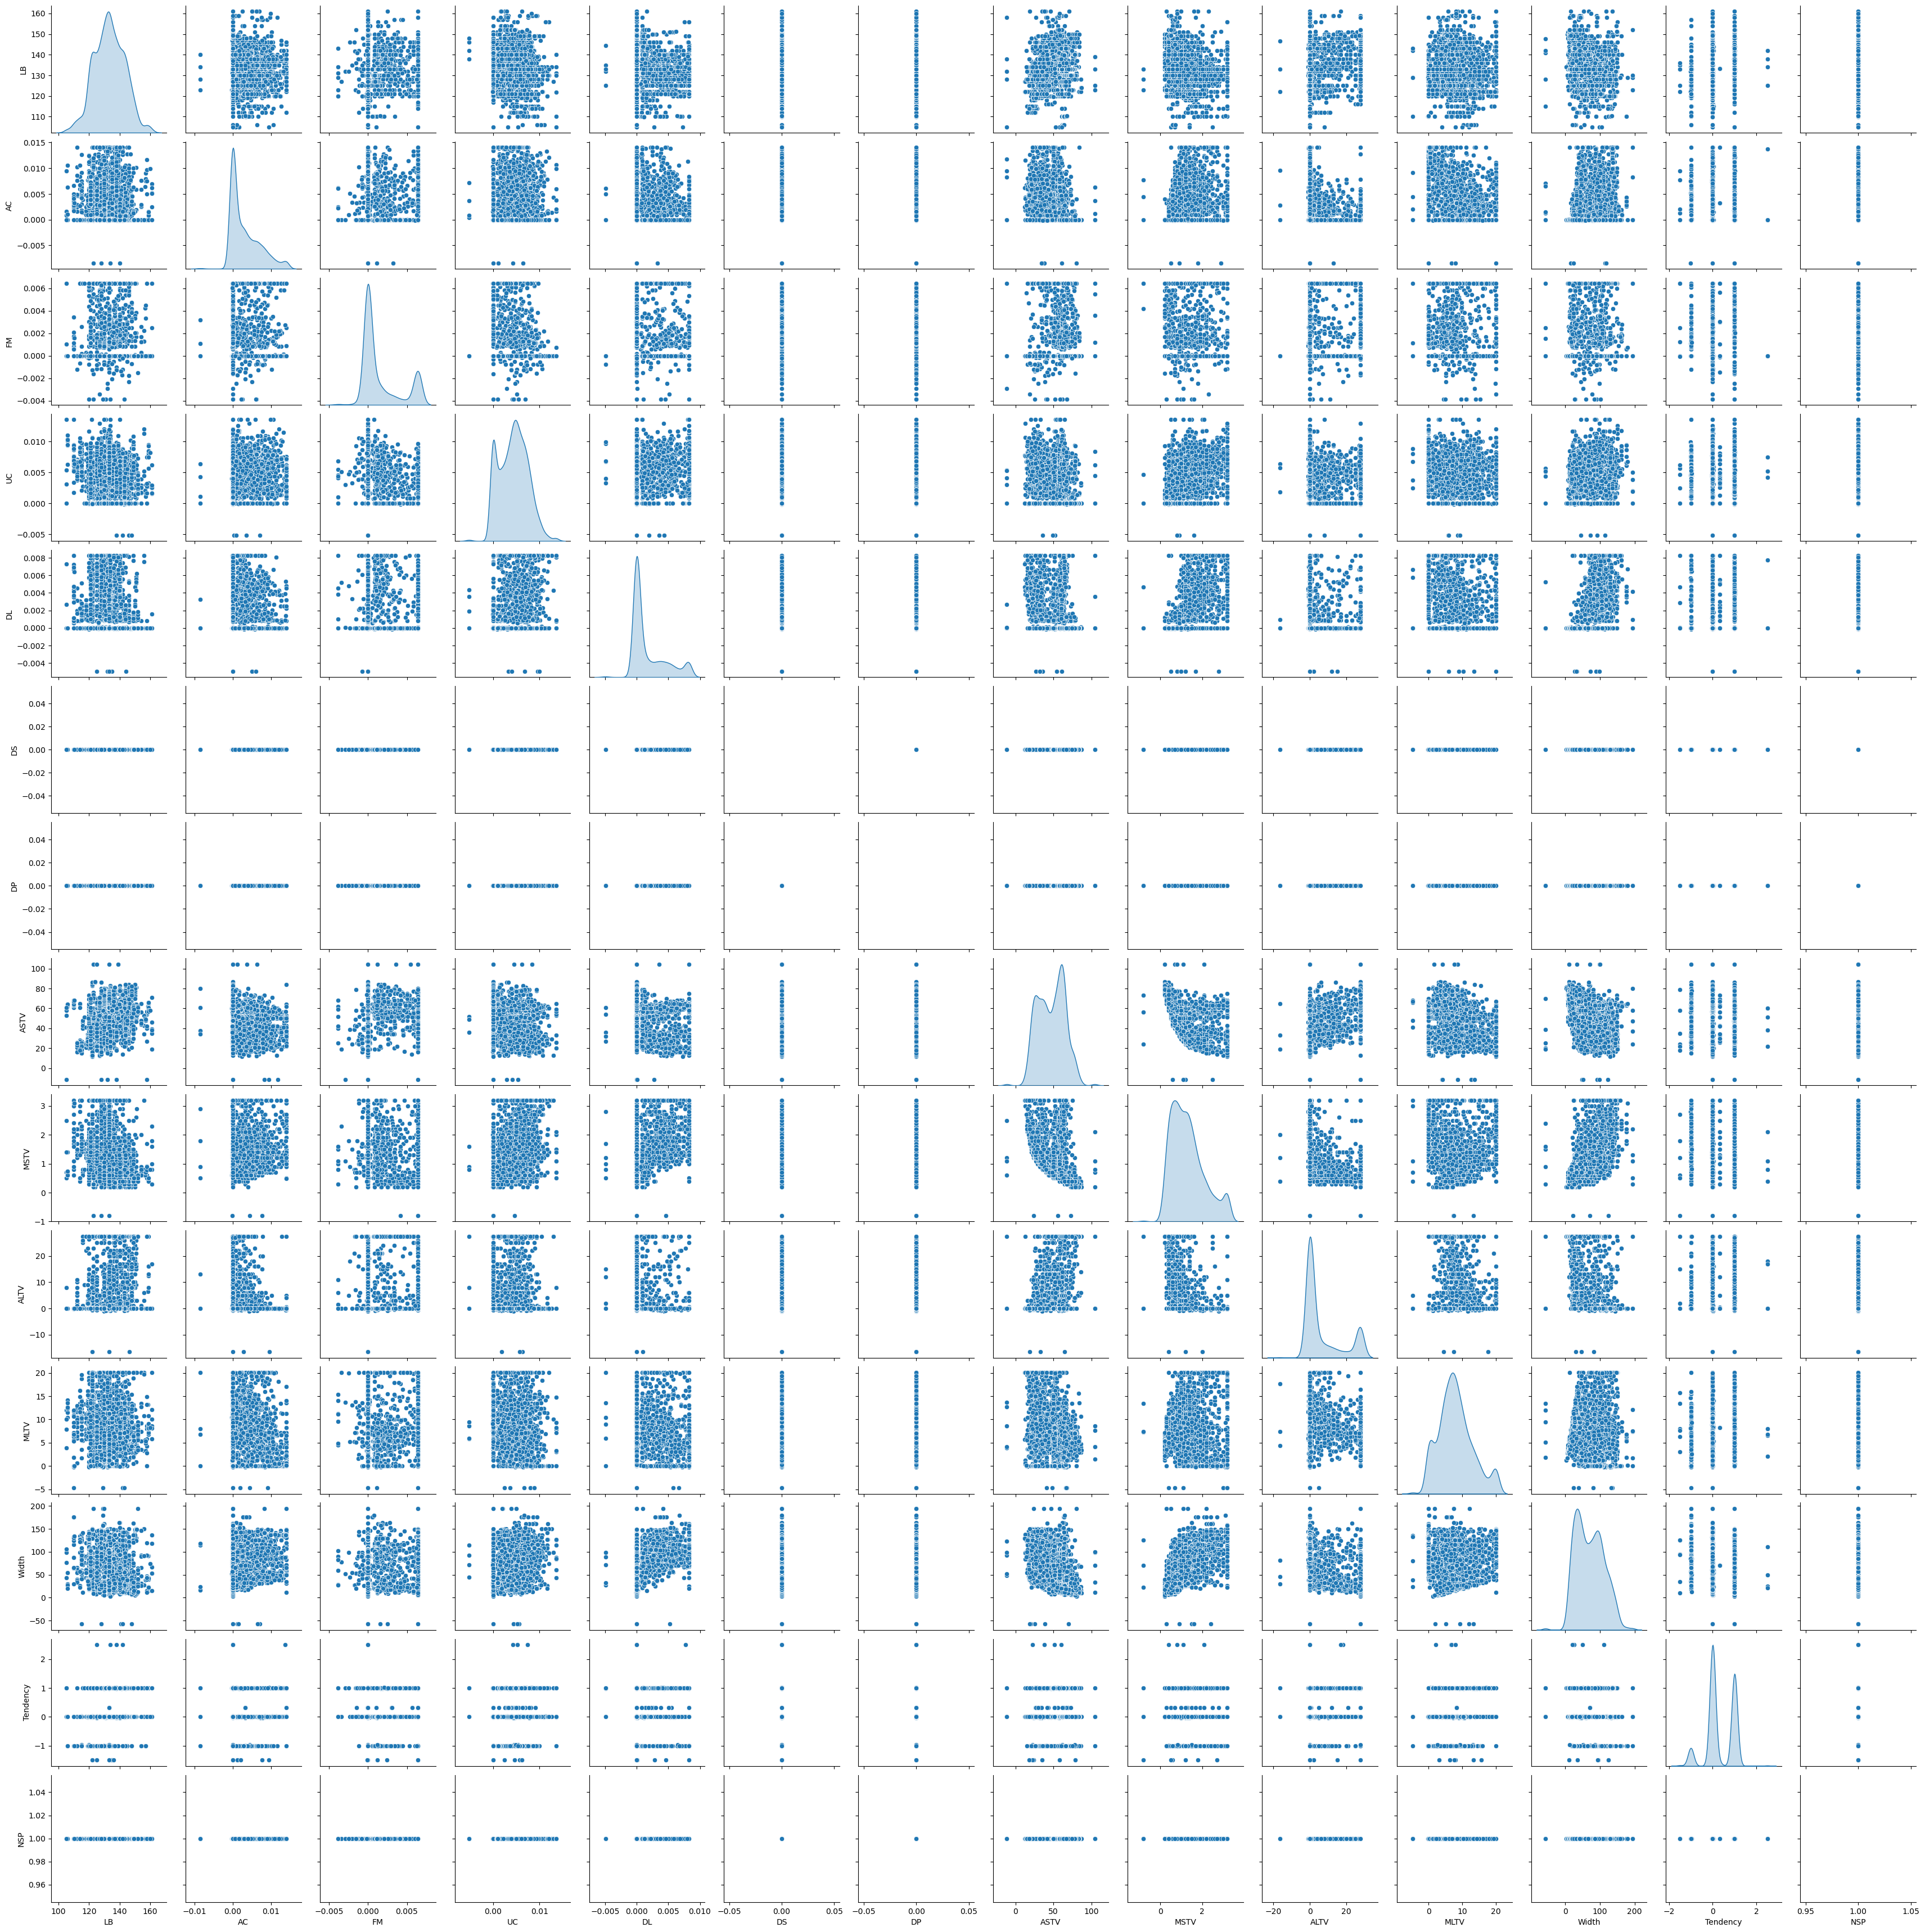

In [32]:
## pairplot
sns.pairplot(df,diag_kind='kde')
plt.show()

#### 4. Pattern Recognition and Insights:

##### Identify any correlations between variables and discuss their potential implications.

In [68]:
## correlation of features
corr = df.corr().unstack().drop_duplicates().sort_values(ascending=False)
corr=corr[corr < 1]
strong_cor=corr[corr>0.5]
weak_cor=corr[corr<-0.5]
print(f'Top Positive Correlations:\n{strong_cor}')
print(f'Top Negative Correlations:\n{weak_cor}')

Top Positive Correlations:
MSTV  Width    0.646468
DL    MSTV     0.566625
      Width    0.514348
dtype: float64
Top Negative Correlations:
MSTV  ALTV   -0.541296
dtype: float64


##### Look for trends or patterns over time if temporal data is available.

#### 5. Conclusion:

##### Summarize the key insights and patterns discovered through your exploratory analysis.

##### Discuss how these findings could impact decision-making or further analyses.